# Part I - Interest rate determining factors
## by Zainab Oluwagbemisola Kukoyi

## Introduction
> Prosper has several data sources for investors to analyze historical loan performance on the platform, the loan data from Prosper contains 113937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

> Loading dataset and describing its properties through the questions below.

In [2]:
data = pd.read_csv("prosperLoanData.csv")

In [3]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
data.shape

(113937, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
data = data[['ListingKey', 
               'CreditGrade', 
               'Term', 
               'LoanOriginationDate',
               'LoanStatus', 
               'BorrowerAPR', 
               'BorrowerRate',  
               'ListingCategory (numeric)', 
               'Occupation', 
               'EmploymentStatus', 
               'EmploymentStatusDuration', 
               'IsBorrowerHomeowner', 
               'IncomeRange',
               'ProsperRating (Alpha)',
               'DebtToIncomeRatio',
               'EstimatedReturn','LoanOriginalAmount',
               'MonthlyLoanPayment','StatedMonthlyIncome',]]

In [7]:
# change datatype of closed date to datatime
data['LoanOriginationDate'] = pd.to_datetime(data['LoanOriginationDate'])
data['loan_year'] = pd.DatetimeIndex(data['LoanOriginationDate']). year
data['loan_month'] = pd.DatetimeIndex(data['LoanOriginationDate']). month

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingKey                   113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanOriginationDate          113937 non-null datetime64[ns]
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
ProsperRating (Alpha)        84853 non-null object
DebtToIncomeRatio            105383 non-null float64
EstimatedReturn              84853 non-null float64
LoanOriginalAmount           113937 non-null int64


In [9]:
data.isna().sum()


ListingKey                       0
CreditGrade                  84984
Term                             0
LoanOriginationDate              0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
IsBorrowerHomeowner              0
IncomeRange                      0
ProsperRating (Alpha)        29084
DebtToIncomeRatio             8554
EstimatedReturn              29084
LoanOriginalAmount               0
MonthlyLoanPayment               0
StatedMonthlyIncome              0
loan_year                        0
loan_month                       0
dtype: int64

In [10]:
data.duplicated().sum()

871

In [11]:
data.describe()

,Term,BorrowerAPR,BorrowerRate,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,EstimatedReturn,LoanOriginalAmount,MonthlyLoanPayment,StatedMonthlyIncome,loan_year,loan_month
count,113937.000000,113912.000000,113937.000000,113937.000000,106312.000000,105383.000000,84853.000000,113937.00000,113937.000000,1.139370e+05,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,2.774209,96.071582,0.275947,0.096068,8337.01385,272.475783,5.608026e+03,2011.042611,6.591783
std,10.436212,0.080364,0.074818,3.996797,94.480605,0.551759,0.030403,6245.80058,192.697812,7.478497e+03,2.506634,3.567309
min,12.000000,0.006530,0.000000,0.000000,0.000000,0.000000,-0.182700,1000.00000,0.000000,0.000000e+00,2005.000000,1.000000
25%,36.000000,0.156290,0.134000,1.000000,26.000000,0.140000,0.074080,4000.00000,131.620000,3.200333e+03,2008.000000,3.000000
50%,36.000000,0.209760,0.184000,1.000000,67.000000,0.220000,0.091700,6500.00000,217.740000,4.666667e+03,2012.000000,7.000000
75%,36.000000,0.283810,0.250000,3.000000,137.000000,0.320000,0.116600,12000.00000,371.580000,6.825000e+03,2013.000000,10.000000
max,60.000000,0.512290,0.497500,20.000000,755.000000,10.010000,0.283700,35000.00000,2251.510000,1.750003e+06,2014.000000,12.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingKey                   113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanOriginationDate          113937 non-null datetime64[ns]
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
ProsperRating (Alpha)        84853 non-null object
DebtToIncomeRatio            105383 non-null float64
EstimatedReturn              84853 non-null float64
LoanOriginalAmount           113937 non-null int64


In [13]:
data.shape

(113937, 21)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
ListingKey                   113937 non-null object
CreditGrade                  28953 non-null object
Term                         113937 non-null int64
LoanOriginationDate          113937 non-null datetime64[ns]
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
ProsperRating (Alpha)        84853 non-null object
DebtToIncomeRatio            105383 non-null float64
EstimatedReturn              84853 non-null float64
LoanOriginalAmount           113937 non-null int64


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables both qualitative and quntitative variable on each loan.
### What is/are the main feature(s) of interest in your dataset?

> I wanted to look at the factors that could impact their interest rate in my inquiry.What affects the borrower’s APR/interest rate?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> > I am interested in looking at the characteristics of borrowers that could affect their interest rate. The i will be paying attention on the emplyment staus, salary range, credit rating, whether or not they are homeowners and some others.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [15]:
data['loan_year'] = data['loan_year'].astype(str)

In [16]:
ordinal_rating = ['2005', '2006', '2007', '2008', '2009', '2010','2011','2012','2013','2014']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
data['loan_year'] = data['loan_year'].astype(ordered_var)

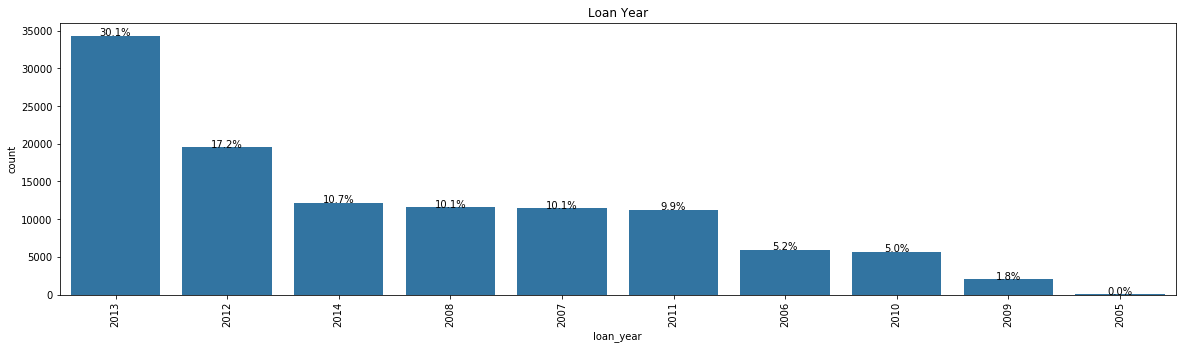

In [17]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['loan_year'].value_counts().sum()
loanyear_counts = data['loan_year'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_loanyear_counts = loanyear_counts[0]
mycol = sb.color_palette()[0]
type_order=data['loan_year'].value_counts().index
sb.countplot(data = data, x = 'loan_year', color = mycol,order=type_order)
# Recalculating the type_counts just to have clarity.
loanyear_counts = data['loan_year'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = loanyear_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Loan Year');

In [18]:
data['loan_month'] = data['loan_month'].astype(str)

In [19]:
mapping={'1':'January', '2':'Febuary','3':'March','4':'April','5':'May',
         '6':'June','7':'July','8':'August'
         ,'9':'September','10':'October','11':'November','12':'December'}
data['loan_month'] = data['loan_month'].replace(mapping)

In [20]:
ordinal_rating = ['January', 'Febuary', 'March', 'April', 'May', 'June','July','August','September','October','November','December']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
data['loan_month'] = data['loan_month'].astype(ordered_var)

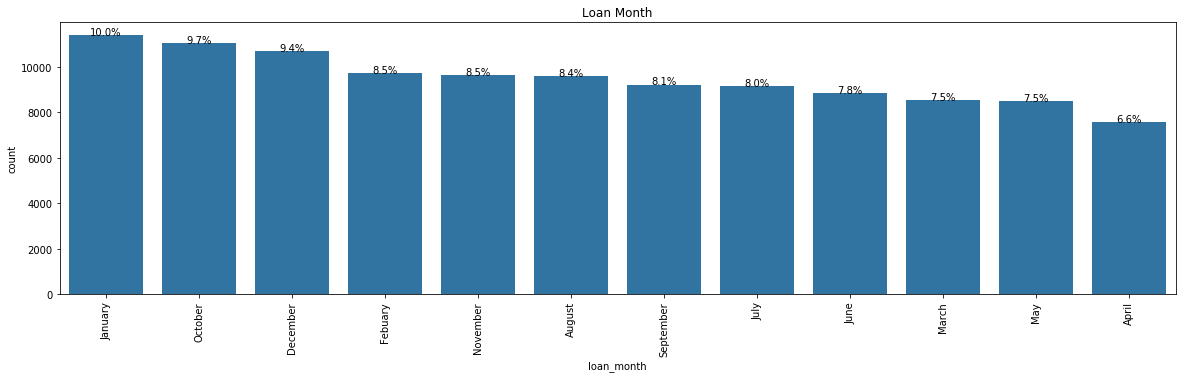

In [21]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['loan_month'].value_counts().sum()
loanmonth_counts = data['loan_month'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_loanmonth_counts =loanmonth_counts[0]
mycol = sb.color_palette()[0]
type_order=data['loan_month'].value_counts().index
sb.countplot(data = data, x = 'loan_month', color = mycol,order=type_order)
# Recalculating the type_counts just to have clarity.
loanmonth_counts = data['loan_month'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = loanmonth_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Loan Month');

> I divided the loan origination date column into months and years and plotted the results. I noticed that loans tend to be created more frequently around the beginning and end of the year. 
> In the loans by year plot, it also detected a significant decline in loans in 2009.

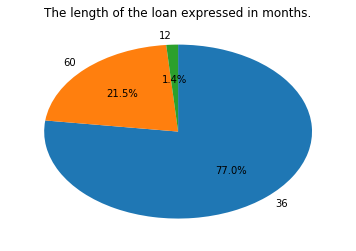

In [22]:
sorted_counts = data['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False);
plt.title('The length of the loan expressed in months.');

> The majority of loans have a 36-month term (3years)

In [23]:
data.EstimatedReturn.dropna(inplace=True)

In [24]:
data.EstimatedReturn.describe()

count    84853.000000
mean         0.096068
std          0.030403
min         -0.182700
25%          0.074080
50%          0.091700
75%          0.116600
max          0.283700
Name: EstimatedReturn, dtype: float64

Text(0.5,1,'Distribution of The Estimated Return.')

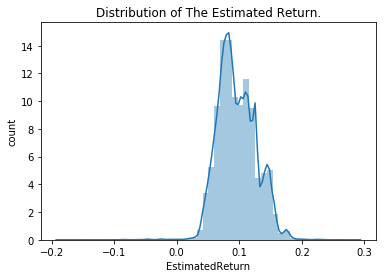

In [25]:
sb.distplot(data['EstimatedReturn']);
plt.ylabel('count')
plt.title("Distribution of The Estimated Return.")

> The majority of our loans have an estimated return between 0% and 20%, which indicates that the distribution of projected returns is biased to the right. I'd love to know if there is a relationship between loan term and estimated return.

Text(0.5,1,'Distribution of The Borrower Interest Rate.')

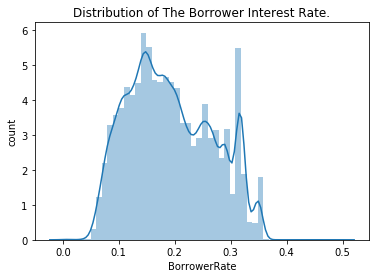

In [26]:
sb.distplot(data['BorrowerRate']);
plt.ylabel('count')
plt.title("Distribution of The Borrower Interest Rate.")

> Interest rates are normally distributed, with a mean/median of 0.19. There is, however, a spike around 0.31. 

In [27]:
data['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

Text(0.5,1,'Distribution of The Loan Original Amount.')

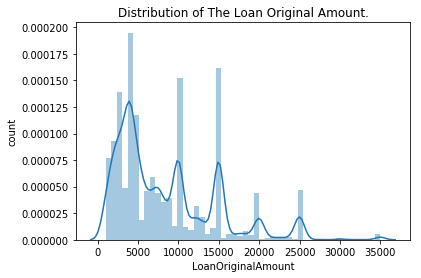

In [28]:
sb.distplot(data['LoanOriginalAmount']);
plt.ylabel('count')
plt.title("Distribution of The Loan Original Amount.")

> The loan amount has a positive skew, with a mean of 8300 exceeding the median of 6500.

Text(0.5,1,'Distribution of Monthly Loan Payment.')

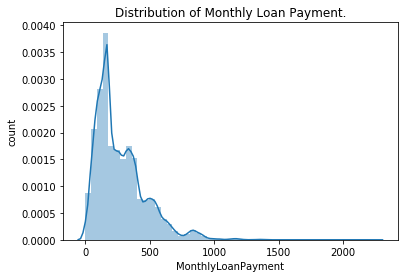

In [29]:
sb.distplot(data['MonthlyLoanPayment']);
plt.ylabel('count')
plt.title("Distribution of Monthly Loan Payment.")

> Let's instead plot it on a log scale as the distribution has a lengthy tail.

Text(0.5,1,'Distribution of Monthly Loan Payment $.')

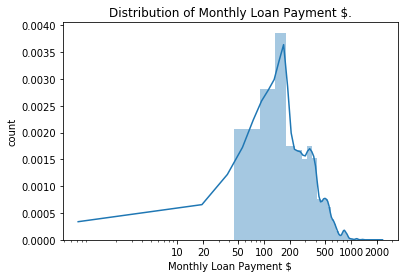

In [30]:
sb.distplot(data['MonthlyLoanPayment']);
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('count')
plt.title("Distribution of Monthly Loan Payment $.")

> Viewing the specifics of the price range below 500 and the peak between 100 and 200 is intriguing.

#### Credit Rating
It appears that the CreditGrade column for before July 2009 and the Post July 2009 columns are different (ProsperRating). When the listing was first created, a Prosper Rating between AA and HR was assigned. The Credit Grade rating assigned at the time the listing became live is applicable for loans originated after July 2009. Only generated for listings from the pre-2009 timeframe and applicable to those listings.

In [31]:
data.CreditGrade.describe()

count     28953
unique        8
top           C
freq       5649
Name: CreditGrade, dtype: object

In [32]:
data.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [33]:
data['ProsperRating (Alpha)'].describe()

count     84853
unique        7
top           C
freq      18345
Name: ProsperRating (Alpha), dtype: object

In [34]:
data['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

> We have many missing values in the CreditGrade and ProsperRating columns, which can be attributed to the switch to prosper rating.
We'll combine the two columns for illustrative purposes.

In [35]:
# fill NA with empty strings
data['ProsperRating (Alpha)'].fillna("", inplace = True)
data['CreditGrade'].fillna("", inplace = True)

# combine credit ratings
data['credit_rating'] = data['ProsperRating (Alpha)'] + data['CreditGrade']

# drop rows with no credit ratings
data = data.query(' credit_rating != ""')

In [36]:
data.credit_rating.describe()

count     113806
unique         8
top            C
freq       23994
Name: credit_rating, dtype: object

In [37]:
# check values
data.credit_rating.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: credit_rating, dtype: int64

In [38]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','NC']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
data['credit_rating'] = data['credit_rating'].astype(ordered_var)

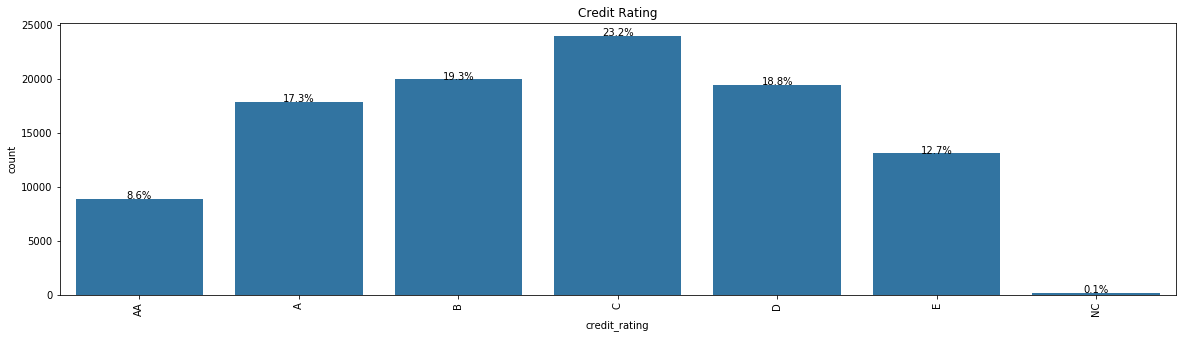

In [39]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['credit_rating'].value_counts().sum()
creditrating_counts = data['credit_rating'].value_counts()
# Return the highest frequency in the `LoanStatus` column
max_creditrating_counts = creditrating_counts[0]
mycol = sb.color_palette()[0]
sb.countplot(data = data, x = 'credit_rating', color = mycol)
# Recalculating the type_counts just to have clarity.
loanmonth_counts = data['credit_rating'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = creditrating_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Credit Rating');

> Prosper gives most borrowers an average rating of "C"
> Credit rating distribution is biased to the right, which is consistent with our observation that the distribution of estimated returns is also skewed to the right.

> Let's investigate this in our bivariate visualizations since it may imply that we have a range of potential predicted returns for a given credit rating

In [40]:
data.LoanStatus.describe()

count      113806
unique         12
top       Current
freq        56576
Name: LoanStatus, dtype: object

In [41]:
data.LoanStatus.value_counts()

Current                   56576
Completed                 37952
Chargedoff                11986
Defaulted                  5015
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [42]:
mapping={'Current':'Current', 'Completed':'Completed','Chargedoff':'Chargedoff','Defaulted':'Defaulted','Cancelled':'Cancelled',
         'FinalPaymentInProgress':'FinalPaymentInProgress','Past Due (1-15 days)':'Past Due Date','Past Due (31-60 days)':'Past Due Date'
         ,'Past Due (61-90 days)':'Past Due Date','Past Due (91-120 days)':'Past Due Date','Past Due (16-30 days)':'Past Due Date','Past Due (>120 days)':'Past Due Date'}
data['LoanStatus'] = data['LoanStatus'].replace(mapping)

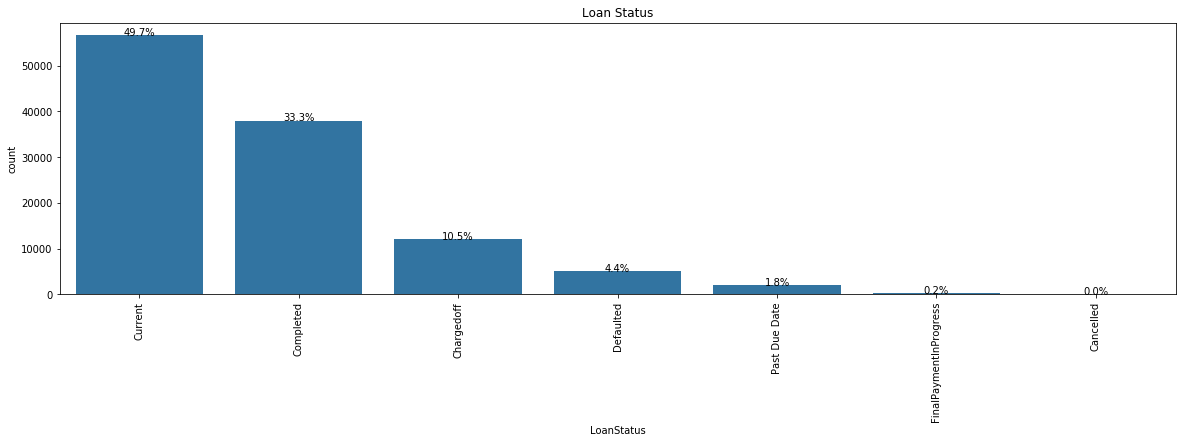

In [43]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['LoanStatus'].value_counts().sum()
LoanStatus_counts = data['LoanStatus'].value_counts()
# Return the highest frequency in the `LoanStatus` column
maxLoanStatus_counts = LoanStatus_counts[0]
mycol = sb.color_palette()[0]
type_order = data['LoanStatus'].value_counts().index
sb.countplot(data = data, x = 'LoanStatus', color = mycol,order=type_order)
# Recalculating the type_counts just to have clarity.
LoanStatus_counts = data['LoanStatus'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = LoanStatus_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Loan Status');

> majority of the loans collected are completed this is good!

#### Income Range.
Let's continue our investigation by examining a few of the underwriting criteria used to assign these Credit Ratings to borrowers. We'll begin by looking at Income Ranges.

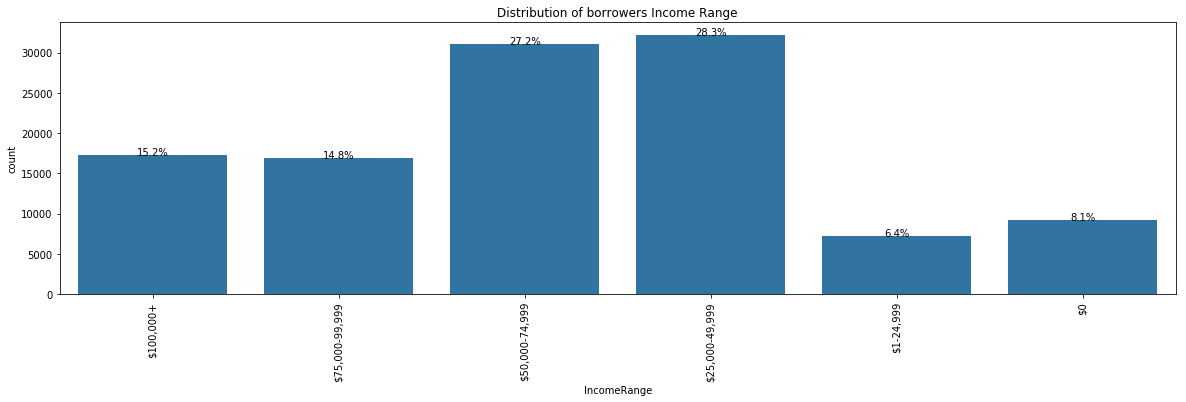

In [44]:

data['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
data['IncomeRange'] = data['IncomeRange'].astype(ordered_var)

#plotting
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['IncomeRange'].value_counts().sum()
IncomeRange_counts = data['IncomeRange'].value_counts()
# Return the highest frequency in the `LoanStatus` column
maxIncomeRange_counts = IncomeRange_counts[0]
mycol = sb.color_palette()[0]
sb.countplot(data = data, x = 'IncomeRange', color = mycol)
# Recalculating the type_counts just to have clarity.
IncomeRange_counts = data['IncomeRange'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = IncomeRange_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Distribution of borrowers Income Range');

> I observe that the majority of borrowers have incomes ranging from 25,000 to 74,000, with high income earners coming in second. I truly want to know if their income range has any bearing on the list category (reason for collecting the loan).

Text(0.5,1,'Distribution of Monthly Income $.')

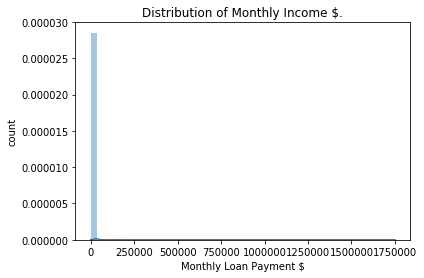

In [45]:
sb.distplot(data['StatedMonthlyIncome']);
plt.ylabel('count')
plt.xlabel('Monthly Loan Payment $')
plt.title("Distribution of Monthly Income $.")

> Due to the high skewness and extreme outliers above the 1000000, no details can be seen; therefore, let's view it in log-scale.
> Limiting the x-axis to $50,000 makes it much better to exclude the outliers as well.

Text(0.5,1,'Distribution of Monthly Income.')

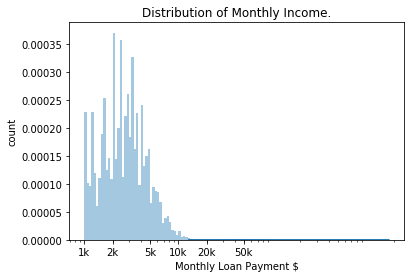

In [46]:
# Stated Monthly Income distribution
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)
sb.distplot(data['StatedMonthlyIncome'], bins = bins);
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Monthly Loan Payment $')
plt.ylabel('count')
plt.title("Distribution of Monthly Income.")

> The graph is considerably more fascinating, the income distribution is almost normal, It is interesting to see the $5K peak.

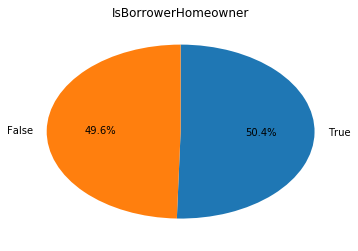

In [47]:
sorted_counts = data['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90, counterclock = False)
plt.title('IsBorrowerHomeowner');

> It appears that having a home or not seems to have little bearing on borrowing money.

In [48]:
data.EmploymentStatus.describe()

count       111551
unique           8
top       Employed
freq         67310
Name: EmploymentStatus, dtype: object

In [49]:
data.EmploymentStatus.value_counts()

Employed         67310
Full-time        26251
Self-employed     6130
Not available     5347
Other             3806
Part-time         1081
Not employed       835
Retired            791
Name: EmploymentStatus, dtype: int64

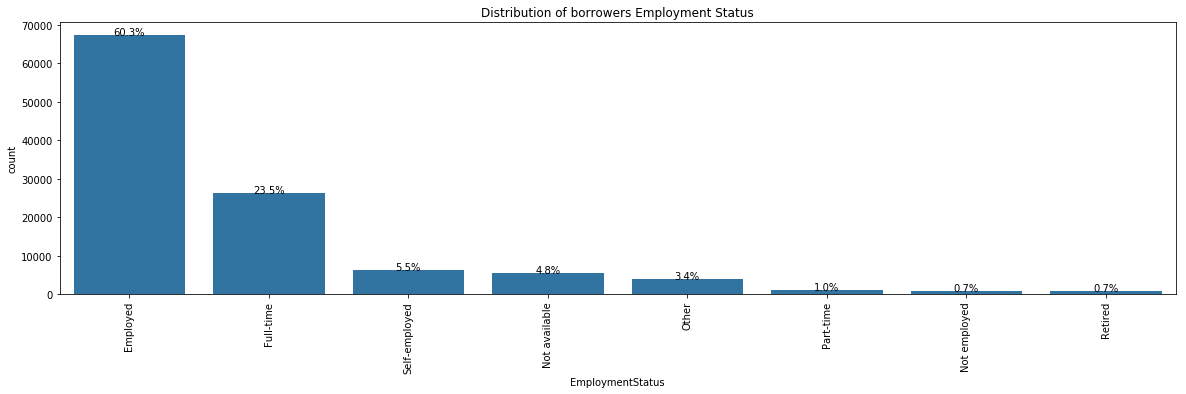

In [50]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]
df = data['EmploymentStatus'].value_counts().sum()
EmploymentStatus_counts = data['EmploymentStatus'].value_counts()
# Return the highest frequency in the `LoanStatus` column
maxEmploymentStatus_counts = EmploymentStatus_counts[0]
mycol = sb.color_palette()[0]
type_order = data['EmploymentStatus'].value_counts().index
sb.countplot(data = data, x = 'EmploymentStatus', color = base_color, order =type_order);
# Recalculating the type_counts just to have clarity.
EmploymentStatus_counts = data['EmploymentStatus'].value_counts()
# get the current tick locations and labels
locs, labels = plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    count = EmploymentStatus_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title('Distribution of borrowers Employment Status');


> Can we infer from the fact that the vast majority of loan borrowers are employed means they all repay their debts?

In [51]:
data.Occupation.describe()

count     110218
unique        67
top        Other
freq       28587
Name: Occupation, dtype: object

In [52]:
data.Occupation.value_counts()

Other                                 28587
Professional                          13605
Computer Programmer                    4469
Executive                              4307
Teacher                                3754
Administrative Assistant               3683
Analyst                                3593
Sales - Commission                     3446
Accountant/CPA                         3230
Clerical                               3162
Sales - Retail                         2794
Skilled Labor                          2743
Retail Management                      2600
Nurse (RN)                             2487
Construction                           1789
Truck Driver                           1672
Laborer                                1595
Police Officer/Correction Officer      1577
Civil Service                          1454
Engineer - Mechanical                  1403
Military Enlisted                      1271
Food Service Management                1236
Engineer - Electrical           

In [53]:
top_10 = data['Occupation'].reset_index(drop=True)

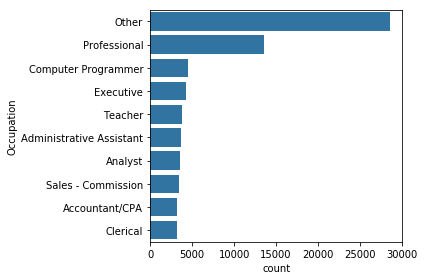

In [54]:
base_color = sb.color_palette()[0]
sb.countplot(y=top_10, order=top_10.value_counts().iloc[:10].index, color=base_color)
plt.tight_layout()
plt.show()

#### Debt to Income Ratio
Your salary alone just provides a portion of the picture, therefore let's look at the borrower's debt to income ratio. In the event that you lose your job and are unable to pay off all of your debts, I assume a creditor would want to ensure that you are not undercapitalized.

In [55]:
data.DebtToIncomeRatio.dropna(inplace=True)

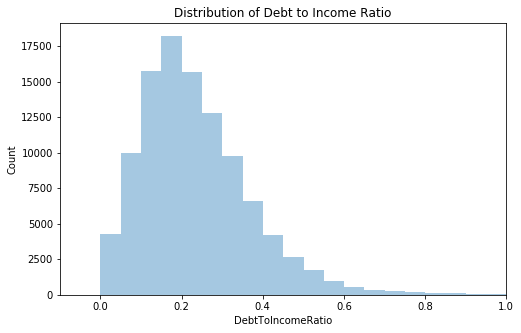

In [56]:
plt.figure(figsize = [8,5])
sb.distplot(data.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.ylabel('Count')
plt.title('Distribution of Debt to Income Ratio');

> It appears that most borrowers who apply for a loan have a debt to income ratio around 20%. 

In [57]:
data['ListingCategory (numeric)'].value_counts()

1     58242
0     16965
7     10470
2      7422
3      7172
6      2565
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       750
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [58]:
data['ListingCategory (numeric)'] = data['ListingCategory (numeric)'].astype(str)

In [59]:
mapping={'0':'Not Availabe','1':'Debt Consolidation', '2':'Home Improvement','3':'Business','4':'Personal Loan','5':'Student Use','6':'Auto','7':'Other','8':'Baby&Adoption',
         '9':'Boat','10':'Cosmetic Procedure','11':'Engagement Ring','12':'Green Loans','13':'Household Expenses','14':'Large Purchases','15':'Medical/Dental','16':'Motorcycle',
         '17':'RV','18':'Taxes','19':'Vacation','20':'Wedding Loans'}
data['ListingCategory'] = data['ListingCategory (numeric)'].replace(mapping)

In [60]:
data.drop(data[data.ListingCategory== 'Not Availabe'].index, inplace=True)

Text(0.5,1,'Listing Category')

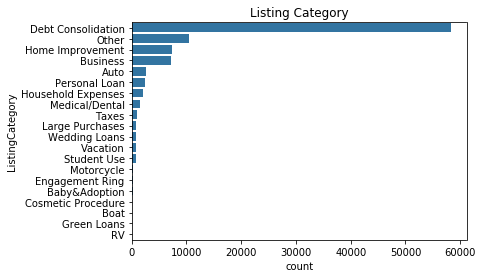

In [61]:
base_color = sb.color_palette()[0]
type_order = data['ListingCategory'].value_counts().index
sb.countplot(data = data, y= 'ListingCategory', color = base_color, order =type_order);
plt.title('Listing Category')

> It's concerning that the majority of people who applied for loans used them to settle debts. I'd be interested in seeing if this has any bearing on if they can repay their loans, what do you think? 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Regarding income, debt to income ratio, credit rating, expected returns, monthly income,and monthly loan payments we observed distributions that were largely normal.
> The StatedMonthlyIncome has some outliers that are too far from the majority of the numbers, and in some charts, these outliers are identified by restricting the axis values. Due of its extremely long tail, monthly revenue and loan payments underwent a log transformation.
> It was determined that columns, such IncomeRange, loan month and year should be modified to "Categorical."
  *  It's concerning that the majority of people who applied for loans used them to settle debts. I'd be interested in seeing    if this has any bearing on if they can repay their loans, what do you think? 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We consolidated multiple rows for various viaualizations where the categories seemed to be redundant in order to clean up our visualizations. For instance,
* "Not employed" and "Not displayed" both have income ranges that are practically equal to $0. 
* After 2009, Prosper adopted their own approach for credit ratings, which left a large number of rows blank. These features were integrated to create a full Credit Rating function.
* I changed LoanOriginationDate datatype to date type, futher splited it to laon year and loan month.
* replced listing cartegory values with strings.
* Some features had long-tail, skewed distributions, which were examined on a log-scale, revealing the hidden distribution in some areas.

## Bivariate Exploration

In [62]:
#Create lists for numeric and categorical variables
quantitative_variables =['BorrowerAPR', 'DebtToIncomeRatio','EstimatedReturn',
               'LoanOriginalAmount', 'MonthlyLoanPayment',
               'StatedMonthlyIncome']
qualitative_variables = ['LoanStatus', 'credit_rating', 'ListingCategory', 'Occupation', 'EmploymentStatus',
                  'IncomeRange','IsBorrowerHomeowner','Term','loan_year','loan_month']

### Relationship between interest rate and other quantitative variables

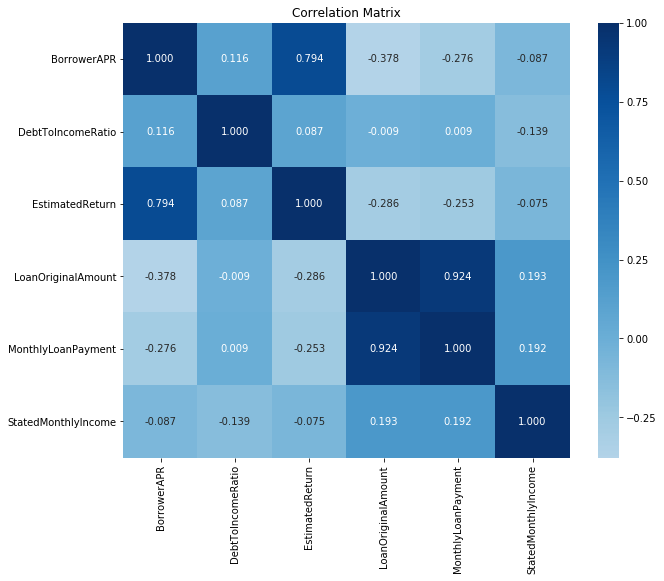

In [63]:
plt.figure(figsize = [10, 8])
sb.heatmap(data[quantitative_variables ].corr(), annot = True, fmt = '.3f',
           cmap = 'Blues', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

Text(0.5,1,'Scatter Plot of interest rate and loan original amount')

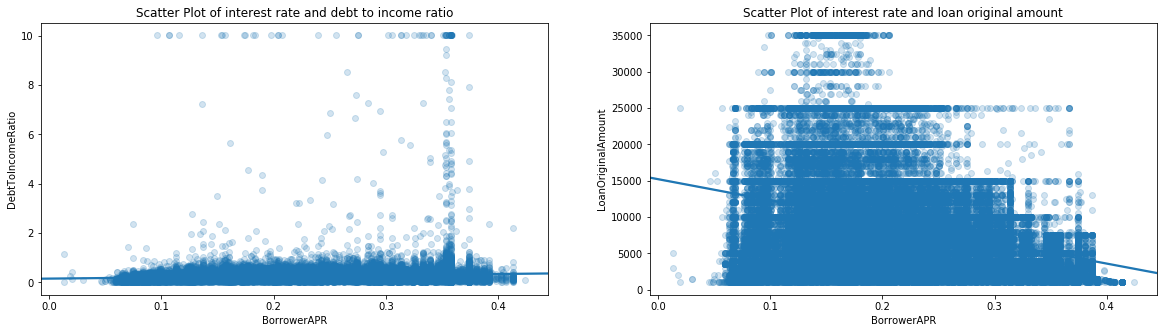

In [64]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.regplot(data = data, x = 'BorrowerAPR', y = 'DebtToIncomeRatio', scatter_kws={'alpha':0.2});
plt.xlabel('BorrowerAPR')
plt.ylabel('DebtToIncomeRatio')
plt.title('Scatter Plot of interest rate and debt to income ratio')

plt.subplot(1, 2, 2)
sb.regplot(data = data, x = 'BorrowerAPR', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.2});
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount')
plt.title('Scatter Plot of interest rate and loan original amount')

> * Debt to income ratio does not significantly affect interest rate; contrary, there is a very weak correlation between the two.
> * The loan amount and interest rate are negatively correlated, meaning that the smaller the loan amount, the higher the interest rate.

Text(0.5,1,'Scatter Plot of interest rate and  monthly income')

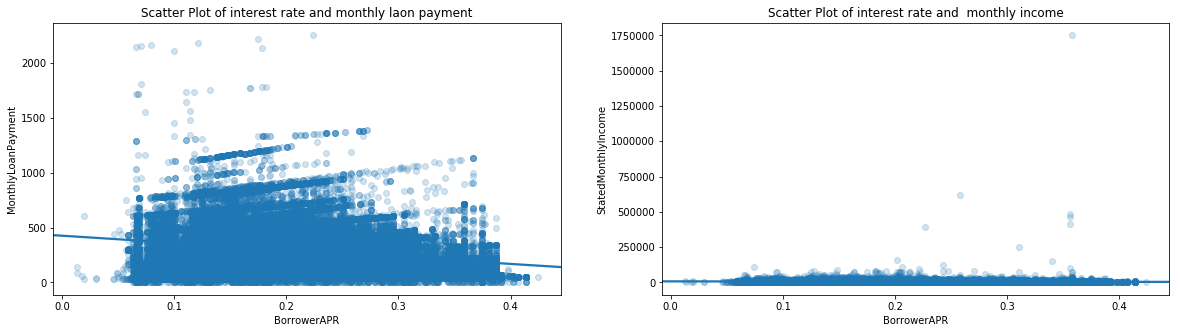

In [65]:
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.regplot(data = data, x = 'BorrowerAPR', y = 'MonthlyLoanPayment', scatter_kws={'alpha':0.2});
plt.xlabel('BorrowerAPR')
plt.ylabel('MonthlyLoanPayment')
plt.title('Scatter Plot of interest rate and monthly laon payment')

plt.subplot(1, 2, 2)
sb.regplot(data = data, x = 'BorrowerAPR', y = 'StatedMonthlyIncome', scatter_kws={'alpha':0.2});
plt.xlabel('BorrowerAPR')
plt.ylabel('StatedMonthlyIncome')
plt.title('Scatter Plot of interest rate and  monthly income')

> * There is a modest negative association between monthly loan payment and interest rate; the smaller the monthly loan payment, the higher the interest rate.
> * Interest rate and monthly income do not significantly correlate.

Text(0.5,1,'Scatter Plot of interest rate and Estimated return')

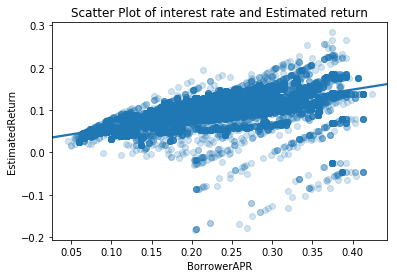

In [66]:
sb.regplot(data = data, x = 'BorrowerAPR', y = 'EstimatedReturn', scatter_kws={'alpha':0.2});
plt.xlabel('BorrowerAPR')
plt.ylabel('EstimatedReturn')
plt.title('Scatter Plot of interest rate and Estimated return')

> * Estimated return and interest rate have a very strong positive association; that is, the higher the interest rate, the larger the estimated return.

Text(0.5,1,'Scatter Plot of loan original amount and Monthly Loan Payment')

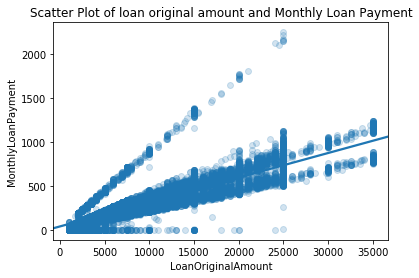

In [67]:
sb.regplot(data = data, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', scatter_kws={'alpha':0.2});
plt.xlabel('LoanOriginalAmount')
plt.ylabel('MonthlyLoanPayment')
plt.title('Scatter Plot of loan original amount and Monthly Loan Payment' )

* I saw a considerable positive return between the loan's original amount and the monthly loan payment on the heat map, which makes sense (the higher the loan amount the higher the the monthly loan payment).

### interest rate and qualitative variable.

Text(0.5,1,'Bar plot of effect of owing property on interest rate')

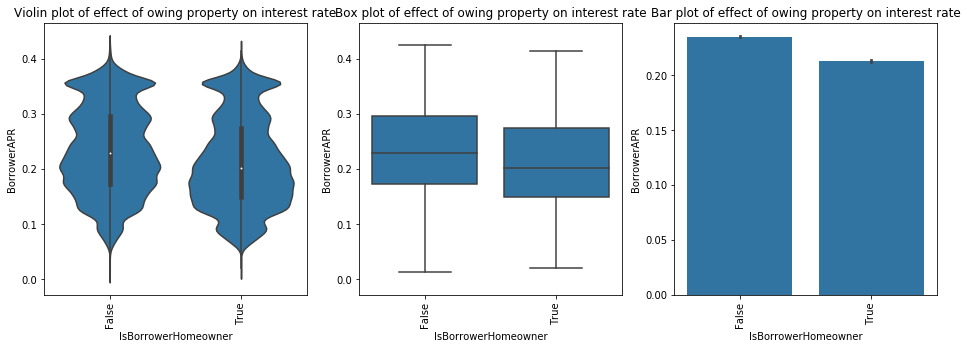

In [68]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=data, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.title('Violin plot of effect of owing property on interest rate')

# RIGHT plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Box plot of effect of owing property on interest rate')

plt.subplot(1, 3, 3)
sb.barplot(data=data, x='IsBorrowerHomeowner', y='BorrowerAPR', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of effect of owing property on interest rate')

> Homeowners often have lower interest rates as borrowers, and their maximum interest rates are also lower than those of non-homeowners.

Text(0.5,1,'Bar plot of income range and interest rate')

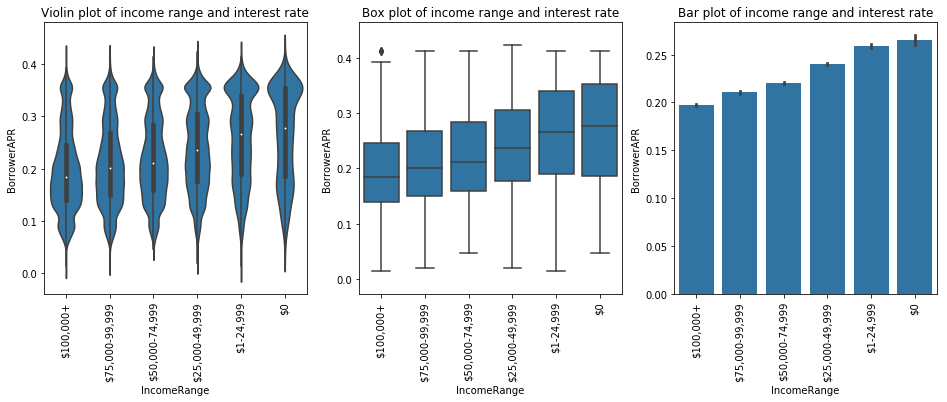

In [69]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 3, 1)
#Let's return the axes object
sb.violinplot(data=data, x='IncomeRange', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.title('Violin plot of income range and interest rate')

# RIGHT plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='IncomeRange', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Box plot of income range and interest rate')

plt.subplot(1, 3, 3)
sb.barplot(data=data, x='IncomeRange', y='BorrowerAPR', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of income range and interest rate')

> We can observe from these graphs that the median interest rate reduces as the borrower's income rises.

> We may hypothesize that as income rises, so does the borrower's capacity to pay back the loan; as a result, the interest rate on the loan rises to compensate the increased likelihood of lower come income earners not paying back.

Text(0.5,1,'Bar plot of Employment Status and interest rate')

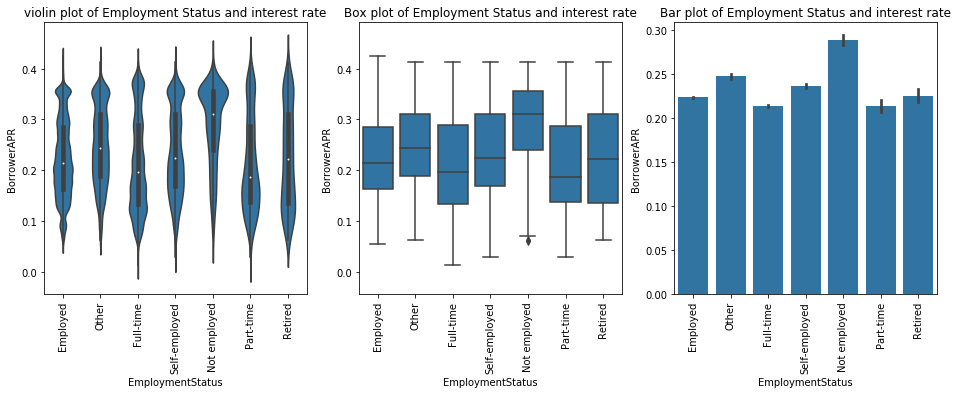

In [70]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=data, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.title('violin plot of Employment Status and interest rate')

# RIGHT plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Box plot of Employment Status and interest rate')

plt.subplot(1, 3, 3)
sb.barplot(data=data, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of Employment Status and interest rate')

> From the above plots, We can also infer that an interest rate are associated with an employment status(Unemployed,retired) associated with higher risks.

Text(0.5,1,'Bar plot of credit rating and interest rate')

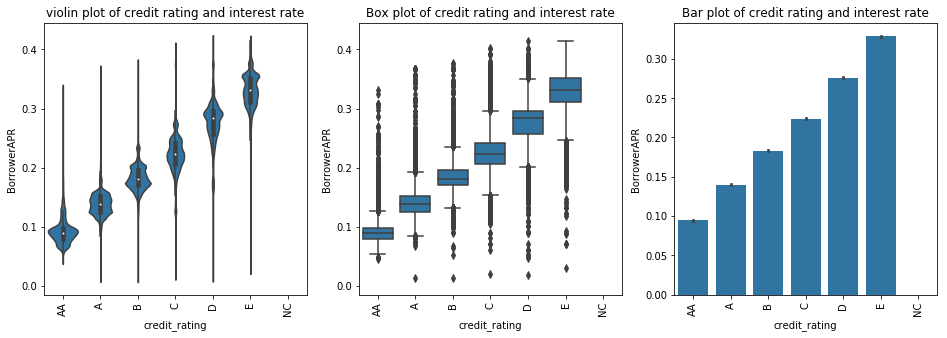

In [71]:
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1=sb.violinplot(data=data, x='credit_rating', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.title('violin plot of credit rating and interest rate')

# RIGHT plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='credit_rating', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Box plot of credit rating and interest rate')

plt.subplot(1, 3, 3)
sb.barplot(data=data, x='credit_rating', y='BorrowerAPR', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of credit rating and interest rate')

> The credit rating boxplot demonstrates the tendency more clearly; when a borrower's credit rating improves, the median interest rate falls dramatically.
Furthermore, creditors often fight for these high-income consumers, lowering the highest credit rating interest rates.

> It's fascinating to observe how the breadth and whiskers of the boxplots decrease when the credit rating rises. This implies that the interest rate for this feature is significantly more predictable for better credit ratings as compared to lower credit ratings.

Text(0.5,1,'Bar plot of Term and interest rate')

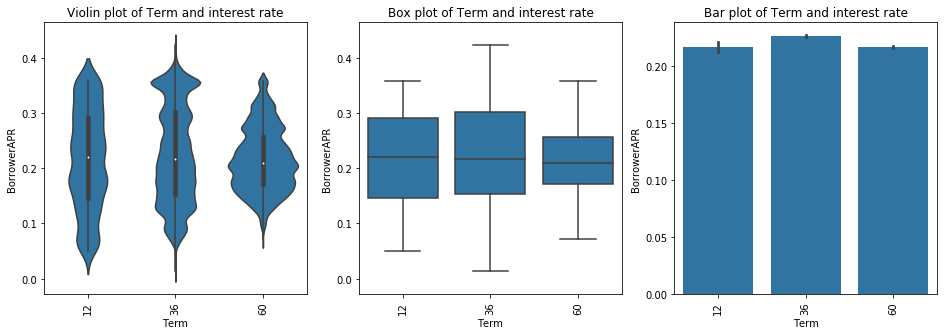

In [72]:
plt.figure(figsize = [16, 5])
plt.subplot(1, 3, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=data, x='Term', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.title('Violin plot of Term and interest rate')

# RIGHT plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=data, x='Term', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=90);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Box plot of Term and interest rate')

plt.subplot(1, 3, 3)
sb.barplot(data=data, x='Term', y='BorrowerAPR', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of Term and interest rate')

> The term of the loan has little to no impact on the interest rate.

since estimated return and interest rate have a strong relationship, Let further see the relationship between estimated return and some of the qualitative variables

Text(0.5,1,'Bar plot of Credit Rating and Estimated Return')

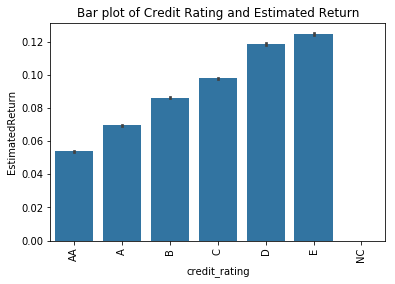

In [73]:
sb.barplot(data=data, x='credit_rating', y='EstimatedReturn', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of Credit Rating and Estimated Return')

> Similar to interest rates, a low credit rating indicates a higher estimated return.

Consider how many of the borrowers who used the loan for debt consolidation were successful in repaying it. In the univariate analysis, we saw that the majority of the borrowers utilized it for debt consolidation.

Text(0.5,1,'Bar plot of Term and Estimated Return')

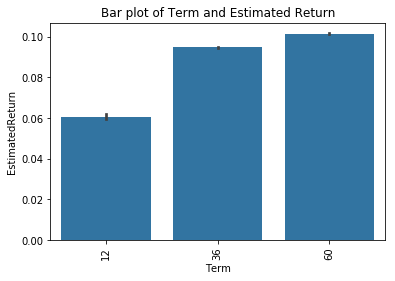

In [74]:
sb.barplot(data=data, x='Term', y='EstimatedReturn', color=base_color)
plt.xticks(rotation = 90)
plt.title('Bar plot of Term and Estimated Return')

> the longer the term the higher the estimated return.

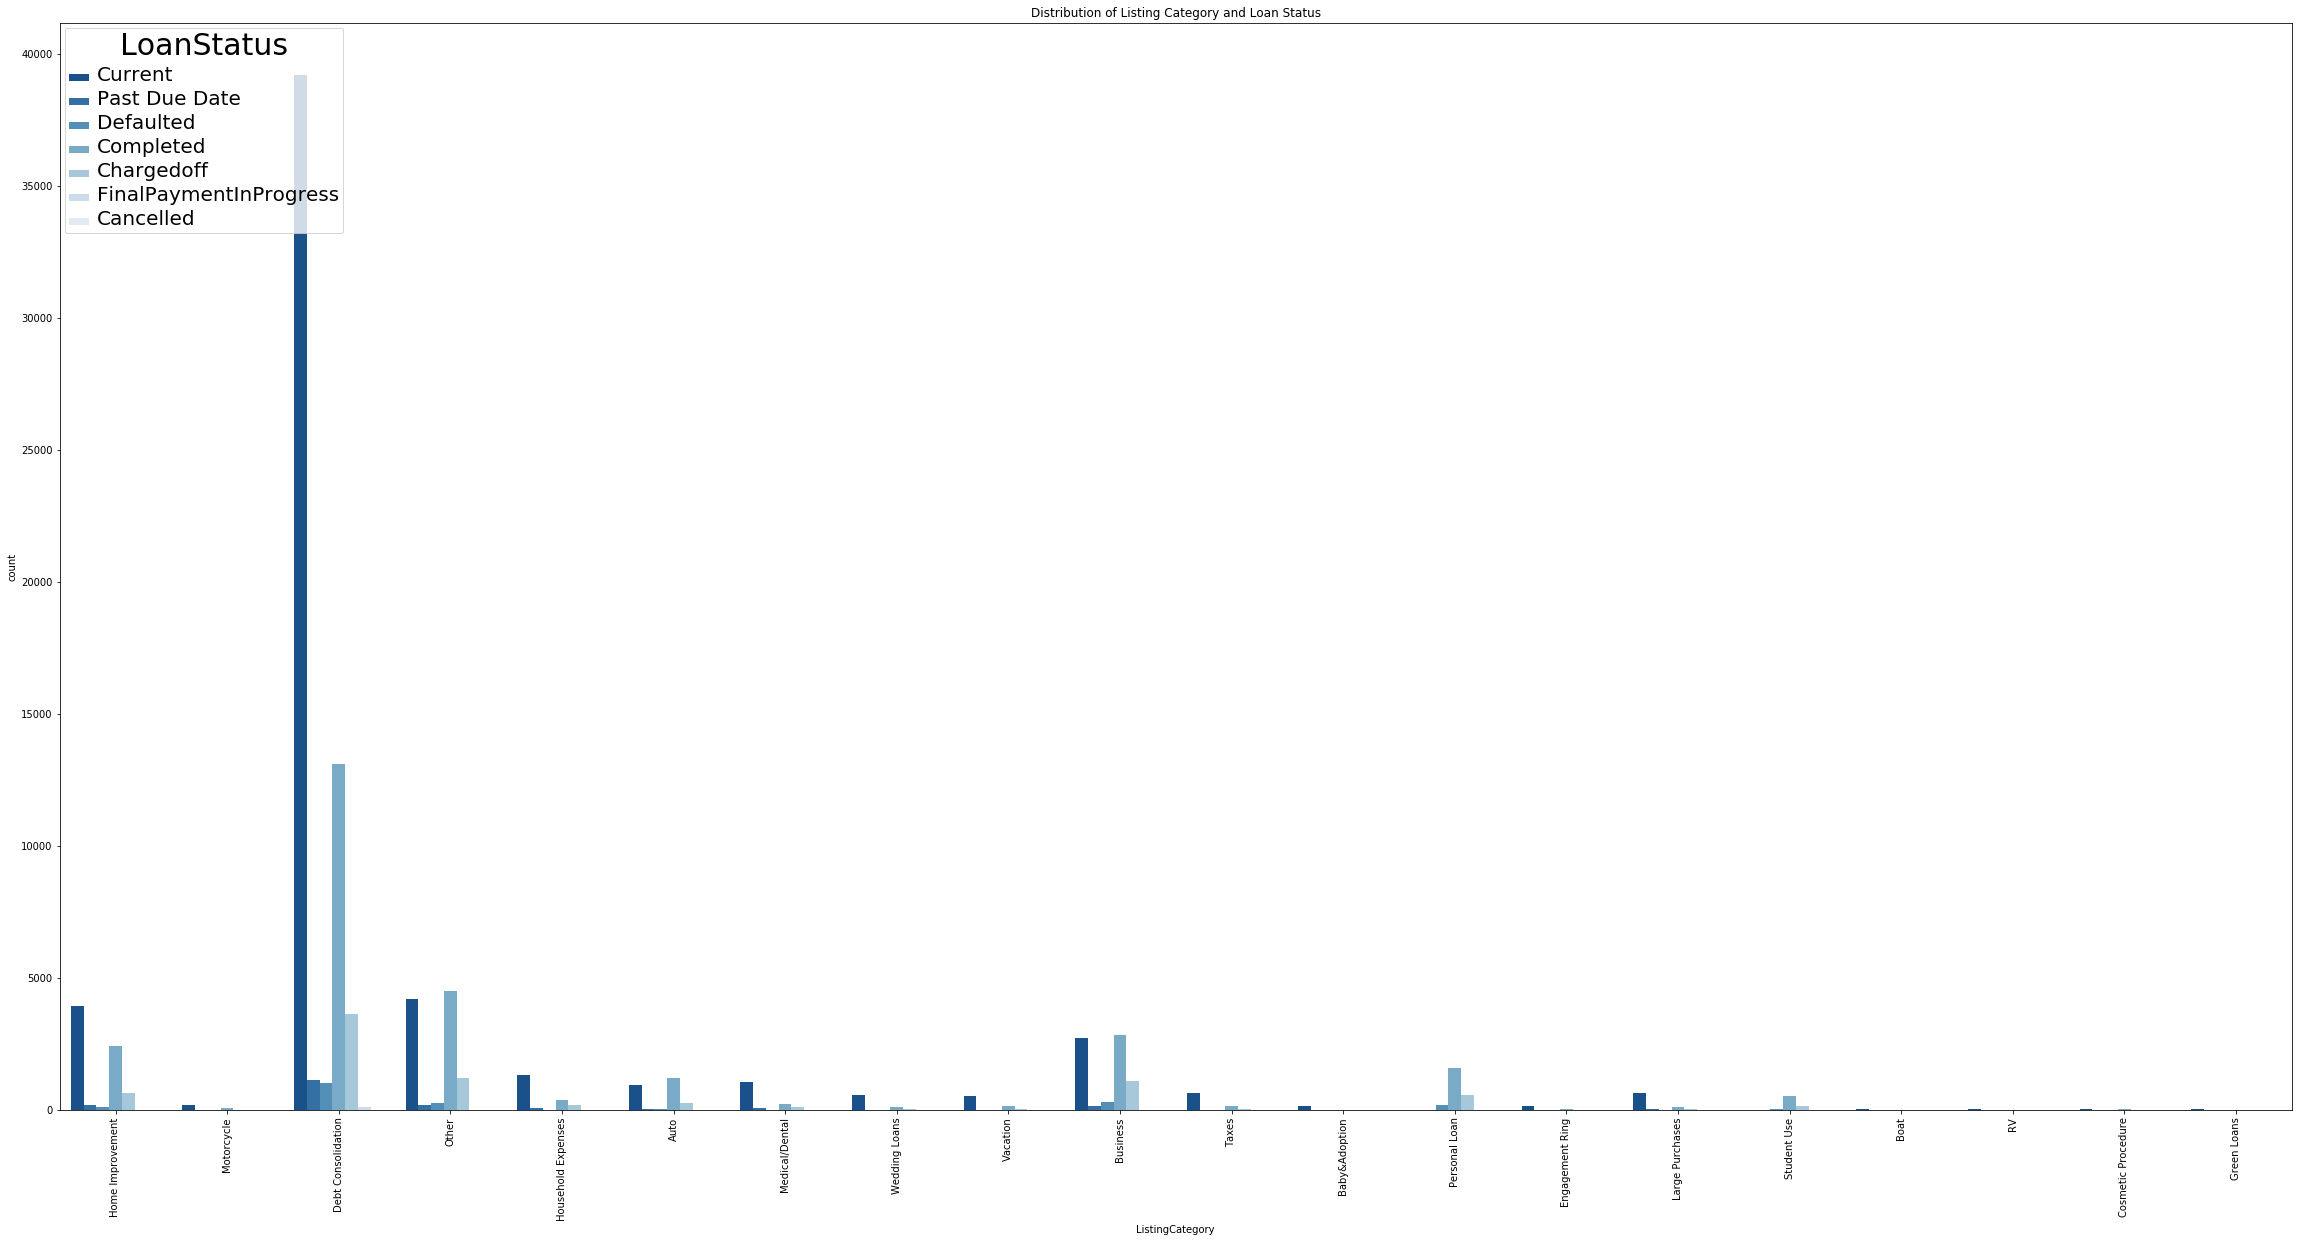

In [75]:
plt.figure(figsize = [40,20])

ax = sb.countplot(data = data, x = 'ListingCategory', hue = 'LoanStatus',
                   palette = 'Blues_r')

plt.title('Distribution of Listing Category and Loan Status')
plt.xticks(rotation = 90)
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
 
# for legend title
plt.setp(ax.get_legend().get_title(), fontsize='30')
plt.show()

> Considering only debt consolidation, the majority of borrowers who utilized the loan for this purpose are still making payments, but we shouldn't disregard the fact that many of them are charged off (causing a bad debt for the the creditors)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> * There’s a negative relationship between interest rates and loan amount, the larger the loan, the lower the rate on average. That was mostly due to them having higher credit scores.
> * There is a modest negative association between monthly loan payment and interest rate; the smaller the monthly loan payment, the higher the interest rate.
> * Estimated return and interest rate have a very strong positive association; that is, the higher the interest rate, the 
larger the estimated return.
> * We observed from these graphs that the median interest rate reduces as the borrower's income rises.
> * Homeowners often have lower interest rates as borrowers, and their maximum interest rates are also lower than those of non-homeowners.> The term of the loan has little to no impact on the interest rate.
> * The term of the loan has little to no impact on the interest rate.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> * I saw a considerable positive return between the loan's original amount and the monthly loan payment on the heat map, which makes sense (the higher the loan amount the higher the the monthly loan payment).
> * Similar to interest rates, a low credit rating indicates a higher estimated return.
> * Considering only debt consolidation, the majority of borrowers who utilized the loan for this purpose are still making payments, but we shouldn't disregard the fact that many of them are charged off (causing a bad debt for the the creditors).


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

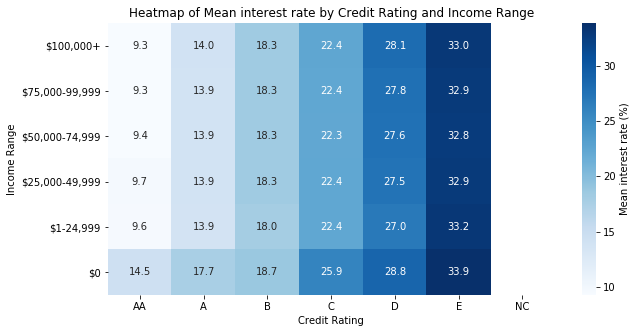

In [76]:
# create a heat map of average interest rate
plt.figure(figsize = [10,5])

ax = data.groupby(['credit_rating', 'IncomeRange']).mean()['BorrowerAPR']*100
ax = ax.reset_index(name = 'BorrowerAPR')
ax = ax.pivot('IncomeRange', columns = 'credit_rating', values = 'BorrowerAPR')

sb.heatmap(ax, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Mean interest rate (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Income Range')
plt.title('Heatmap of Mean interest rate by Credit Rating and Income Range');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> * We can observe from the heat map that higher interest rates are associated with poorer credit scores and lower earnings. It's interesting to note that the interest rate per credit rating group is not significantly affected by the income range.
> * For income levels of 1-100k+, we see no variation in the rate of return across the credit ratings of "AA," "A," and "B." The returns for the income range of 0 across all credit rating groups, however, clearly increase.
> * While there is a little more fluctuation for the credit grades "C," "D," and "E," the mean return is still very consistent.
> * We are aware that credit scores are a more accurate predictor of interest rates.

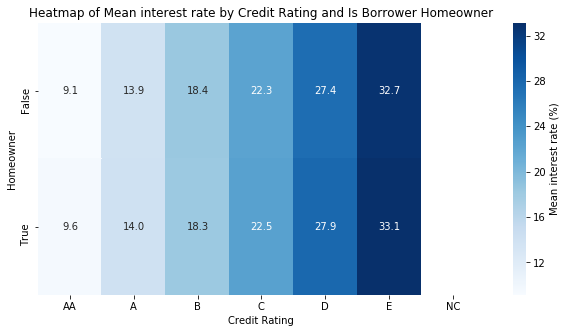

In [77]:
plt.figure(figsize = [10,5])

ax = data.groupby(['credit_rating', 'IsBorrowerHomeowner']).mean()['BorrowerAPR']*100
ax = ax.reset_index(name = 'BorrowerAPR')
ax = ax.pivot('IsBorrowerHomeowner', columns = 'credit_rating', values = 'BorrowerAPR')

sb.heatmap(ax, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Mean interest rate (%)'})
plt.xlabel('Credit Rating')
plt.ylabel('Homeowner')
plt.title('Heatmap of Mean interest rate by Credit Rating and Is Borrower Homeowner');

> Being a house owner isn't as important as the Credit Grade, much like the income rate, because even if the borrower is a home owner, the Credit Grade of HR will result in a high interest rate.

> In spite of this, the majority of borrowers with credit grades of AA and HR own homes. On the other hand, the majority of borrowers with credit grades of HR do not.

In [78]:
from subprocess import call
call(['python','-m','nbconvert','Part_I_exploration_template.ipynb'])

0